In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carregando dataset com pandas
games_df = pd.read_csv('data/games_mental_health.csv').drop(columns=['ID'])
print(games_df)

     Idade     Genero  Horas_jogando_por_semana  Nivel_estresse
0       41      Outro                 20.594431              10
1       27   Feminino                 17.732684              10
2       20  Masculino                  5.252405               3
3       33  Masculino                  7.015513               7
4       31   Feminino                  9.443980               3
..     ...        ...                       ...             ...
145     21      Outro                 15.347390               9
146     49  Masculino                  9.180674               6
147     45  Masculino                 19.303890               1
148     36  Masculino                 17.391261               8
149     27  Masculino                  5.602661               7

[150 rows x 4 columns]


In [3]:
# Exibindo as primeiras linhas
print("Primeiras linhas do DataFrame:")
print(games_df.head())

# Exibindo as informações gerais
print("Informações do DataFrame:")
print(games_df.info())

# Exibindo as estatísticas descritivas
print("Estatísticas Descritivas do DataFrame:")
print(games_df.describe())

# Verificando a quantidade de dados faltantes ou inconstantes por coluna
print("Quantidade de dados faltantes por coluna:")
print(games_df.isnull().sum())

# Verificando o total de dados faltantes ou inconstantes no DataFrame
print("\nTotal de dados faltantes no DataFrame:")
print(games_df.isnull().sum().sum())

# Verificar a inconsistência de dados
print("\nQuantidade dados inconsistentes:")
print(games_df.duplicated().sum())

Primeiras linhas do DataFrame:
   Idade     Genero  Horas_jogando_por_semana  Nivel_estresse
0     41      Outro                 20.594431              10
1     27   Feminino                 17.732684              10
2     20  Masculino                  5.252405               3
3     33  Masculino                  7.015513               7
4     31   Feminino                  9.443980               3
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     150 non-null    int64  
 1   Genero                    150 non-null    object 
 2   Horas_jogando_por_semana  150 non-null    float64
 3   Nivel_estresse            150 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.8+ KB
None
Estatísticas Descritivas do DataFrame:
            Idade  Horas_jogand

In [4]:
# Convertendo a coluna 'Horas_jogando_por_semana' para numérico
games_df['Horas_jogando_por_semana_raw'] = games_df['Horas_jogando_por_semana']
games_df['Horas_jogando_por_semana'] = games_df['Horas_jogando_por_semana'].round().astype(int)

# Ordenando os dados por idade e horas jogadas por semana
games_df = games_df.sort_values(by=['Horas_jogando_por_semana'])

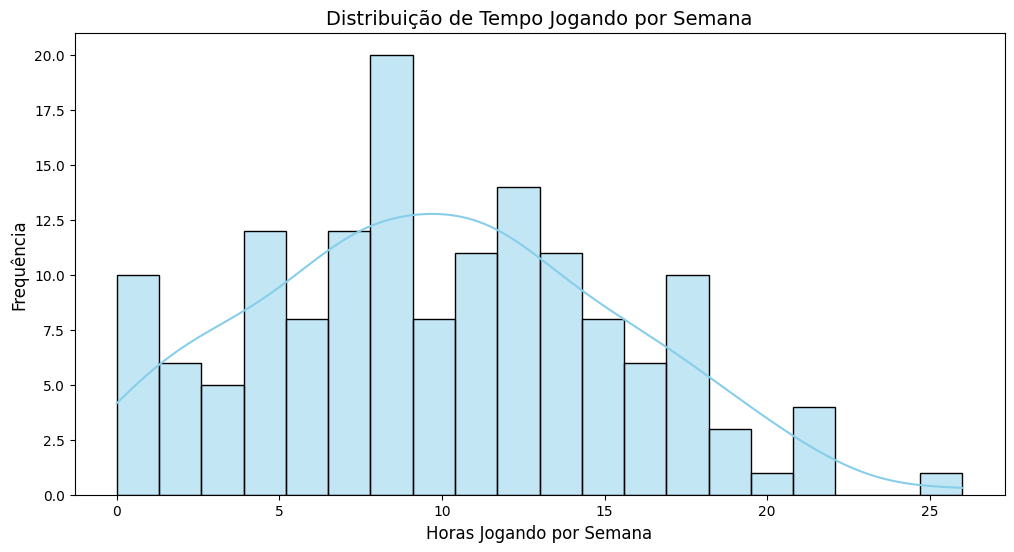

In [5]:
# Histograma da distribuição de tempo jogando por semana
plt.figure(figsize=(12, 6))
sns.histplot(games_df['Horas_jogando_por_semana'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribuição de Tempo Jogando por Semana', fontsize=14)
plt.xlabel('Horas Jogando por Semana', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.savefig('graphs/histograma_horas_jogando.png', dpi=300, bbox_inches='tight')
plt.show()

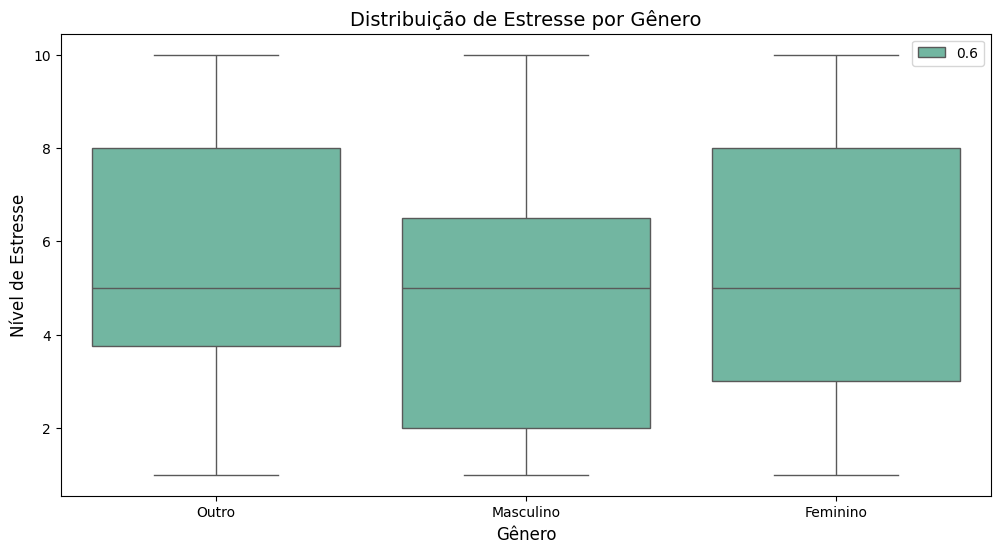

In [31]:
# Boxplot comparando níveis de estresse entre gêneros
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genero', y='Nivel_estresse', data=games_df, palette='Set2', hue=0.6)
plt.title('Distribuição de Estresse por Gênero', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Nível de Estresse', fontsize=12)
plt.savefig('graphs/boxplot_estresse_genero.png', dpi=300, bbox_inches='tight')
plt.show()

Coeficiente de Correlação de Pearson: 0.05


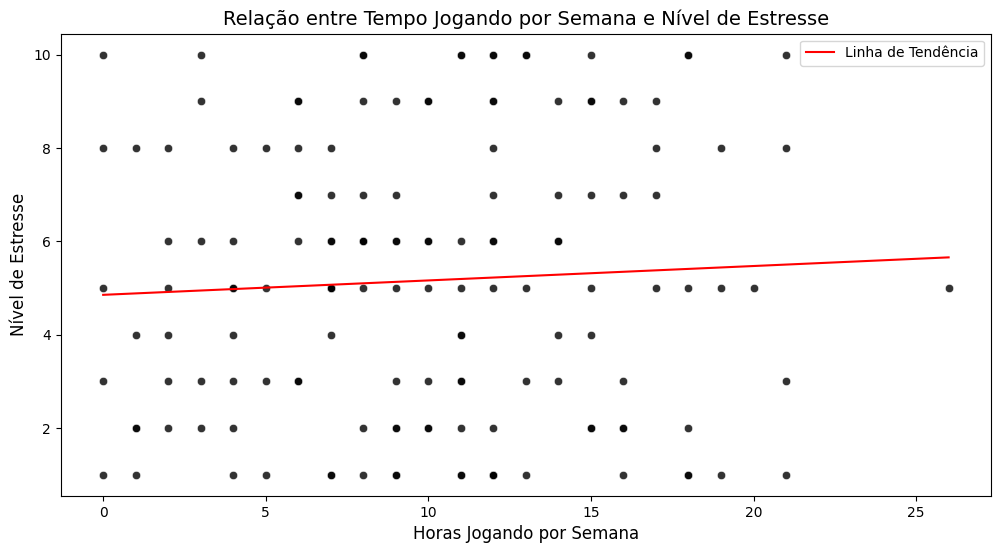

In [7]:
# Gráfico de dispersão (scatter plot) entre tempo jogando e estresse com linha de tendência
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Horas_jogando_por_semana', y='Nivel_estresse', data=games_df, color='black', alpha=0.8)
plt.title('Relação entre Tempo Jogando por Semana e Nível de Estresse', fontsize=14)
plt.xlabel('Horas Jogando por Semana', fontsize=12)
plt.ylabel('Nível de Estresse', fontsize=12)

# Calculando a linha de tendência (regressão linear)
x = games_df['Horas_jogando_por_semana']
y = games_df['Nivel_estresse']
a, b = np.polyfit(x, y, 1)

# gerar o coeficiente de correlacao de Pearson
x_raw = games_df['Horas_jogando_por_semana_raw']
correlation = np.corrcoef(x_raw, y)[0, 1]
print(f'Coeficiente de Correlação de Pearson: {correlation:.2f}')

# Plotando a linha de tendência
plt.plot(x, a * x + b, color='red', label='Linha de Tendência')
plt.legend()
plt.savefig('graphs/scatter_plot_estresse.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# Vamos analizar Estresse por Gênero
estresse_genero = games_df.groupby(['Genero', 'Idade'])['Nivel_estresse'].mean().unstack()
_df = games_df.copy()

In [ ]:
# Calcular média, mediana, moda, desvio padrão e variância para colunas numéricas
# Printar a faixa de idade e horas jogadas por semana ordenadas
# ordenar as idades e horas jogadas por semana
# printar os dados

In [9]:
idades = (_df['Idade'].unique())
idades.sort()
media_idade = _df['Idade'].mean()
mediana_idade = _df['Idade'].median()
moda_idade = _df['Idade'].mode()[0]
desvio_padrao_idade = _df['Idade'].std()
variancia_idade = _df['Idade'].var()

print("Faixa de Idade:")
print(f"    Valores Analisados: {idades}")
print(f"    Média: {media_idade:.2f}")
print(f"    Mediana: {mediana_idade:.2f}")
print(f"    Moda: {moda_idade:.2f}")
print(f"    Desvio Padrão: {desvio_padrao_idade:.2f}")
print(f"    Variância: {variancia_idade:.2f}")


Faixa de Idade:
    Valores Analisados: [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49]
    Média: 31.09
    Mediana: 32.50
    Moda: 27.00
    Desvio Padrão: 10.90
    Variância: 118.72


In [10]:
horas = (_df['Horas_jogando_por_semana'].unique())
horas.sort()
media_horas = _df['Horas_jogando_por_semana'].mean()
mediana_horas = _df['Horas_jogando_por_semana'].median()
moda_horas = _df['Horas_jogando_por_semana'].mode()[0]
desvio_padrao_horas = _df['Horas_jogando_por_semana'].std()
variancia_horas = _df['Horas_jogando_por_semana'].var()

print("Faixa de Horas Jogadas por Semana:")
print(f"    Valores Analisados: {horas}")
print(f"    Média: {media_horas:.2f}")
print(f"    Mediana: {mediana_horas:.2f}")
print(f"    Moda: {moda_horas:.2f}")
print(f"    Desvio Padrão: {desvio_padrao_horas:.2f}")
print(f"    Variância: {variancia_horas:.2f}")

Faixa de Horas Jogadas por Semana:
    Valores Analisados: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 26]
    Média: 9.89
    Mediana: 10.00
    Moda: 12.00
    Desvio Padrão: 5.49
    Variância: 30.15


In [11]:
estresse = (_df['Nivel_estresse'].unique())
estresse.sort()
media_estresse = _df['Nivel_estresse'].mean()
mediana_estresse = _df['Nivel_estresse'].median()
moda_estresse = _df['Nivel_estresse'].mode()[0]
desvio_padrao_estresse = _df['Nivel_estresse'].std()
variancia_estresse = _df['Nivel_estresse'].var()

print("Faixa de Estresse:")
print(f"    Valores Analisados: {estresse}")
print(f"    Média: {media_estresse:.2f}")
print(f"    Mediana: {mediana_estresse:.2f}")
print(f"    Moda: {moda_estresse:.2f}")
print(f"    Desvio Padrão: {desvio_padrao_estresse:.2f}")
print(f"    Variância: {variancia_estresse:.2f}")

Faixa de Estresse:
    Valores Analisados: [ 1  2  3  4  5  6  7  8  9 10]
    Média: 5.16
    Mediana: 5.00
    Moda: 5.00
    Desvio Padrão: 2.94
    Variância: 8.62


In [12]:
# Vamos quebrar horas jogadas em intervalos de 2 horas
_df['Horas_jogando_por_semana'] = pd.cut(
    _df['Horas_jogando_por_semana'],
    bins=range(0, 27, 2),
    labels=[f"{i}-{i+2}" for i in range(0, 26, 2)]
)

# Vamos quebrar idade em intervalos de 5 anos
_df['Idade'] = pd.cut(
    _df['Idade'],
    bins=range(10, 51, 5),
    labels=[f"{i}-{i+5}" for i in range(10, 50, 5)]
)

Genero          Feminino  Masculino  Outro
Nivel_estresse                            
1                    4.0       13.0    4.0
2                    6.0        6.0    5.0
3                    4.0        8.0    3.0
4                    4.0        NaN    4.0
5                    7.0        6.0    9.0
6                    5.0        8.0    5.0
7                    4.0        4.0    2.0
8                    3.0        3.0    5.0
9                    5.0        3.0    6.0
10                   5.0        4.0    5.0


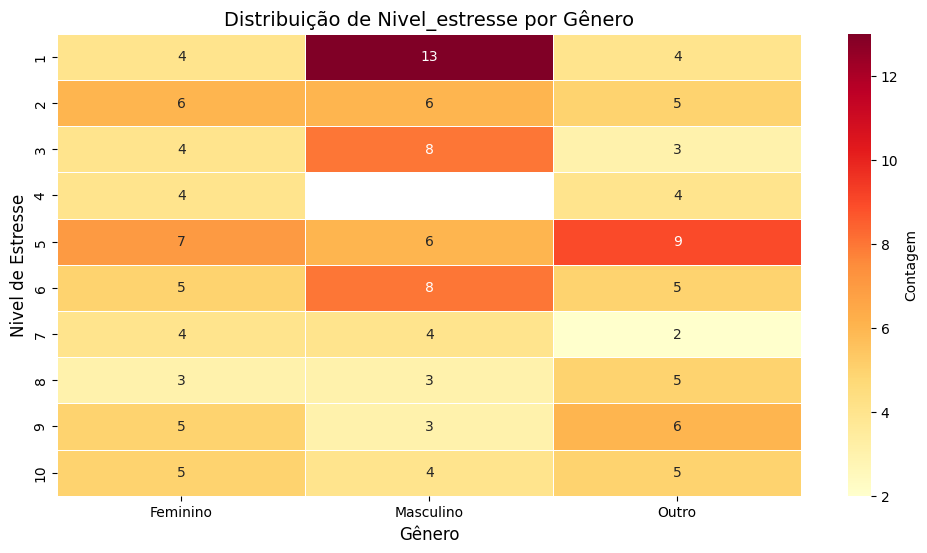

In [13]:
# Tabela de Distribuição de Nivel_estresse por Gênero
idade_genero = _df.groupby(['Nivel_estresse', 'Genero']).size().unstack()
print(idade_genero.head(80))
# Heatmap de Distribuição de Nivel_estresse por Gênero
plt.figure(figsize=(12, 6))
sns.heatmap(
    idade_genero,
    cmap='YlOrRd',
    annot=True,  # Mostrar valores nas células
    linewidths=0.5,
    cbar_kws={'label': 'Contagem'}
)
plt.title('Distribuição de Nivel_estresse por Gênero', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Nivel de Estresse', fontsize=12)
plt.savefig('graphs/heatmap_nivel_estresse_genero.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\danzi\AppData\Local\Temp\ipykernel_16016\578817800.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idade_genero = _df.groupby(['Idade', 'Genero']).size().unstack()


Genero  Feminino  Masculino  Outro
Idade                             
10-15          3          9      2
15-20          9          5      7
20-25          4          8      4
25-30          6          8      7
30-35          5          5      5
35-40          9         12      9
40-45          4          3      9
45-50          7          5      5


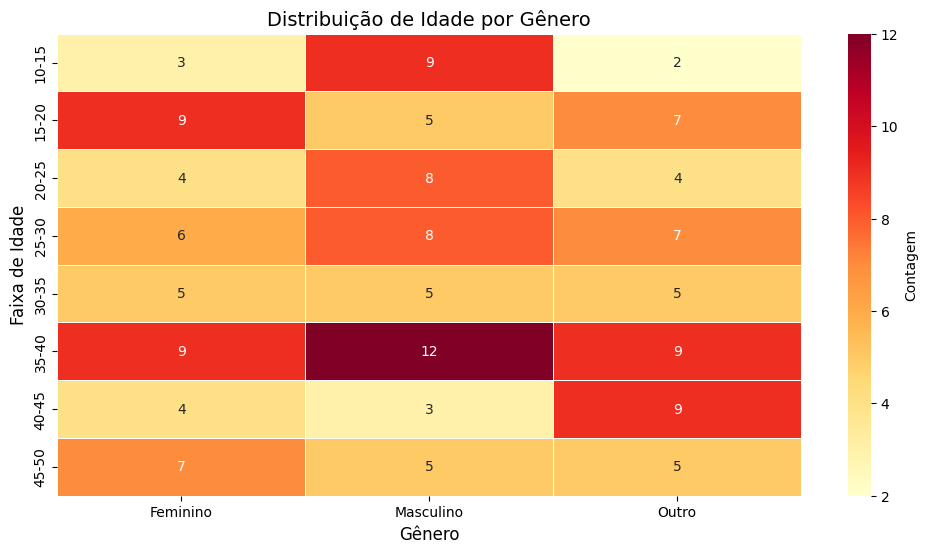

In [14]:
# Tabela de Distribuição de Idade por Gênero sem o Estresse
idade_genero = _df.groupby(['Idade', 'Genero']).size().unstack()
print(idade_genero.head(80))
# Heatmap de Distribuição de Idade por Gênero sem o Estresse
plt.figure(figsize=(12, 6))
sns.heatmap(
    idade_genero,
    cmap='YlOrRd',
    annot=True,  # Mostrar valores nas células
    linewidths=0.5,
    cbar_kws={'label': 'Contagem'}
)
plt.title('Distribuição de Idade por Gênero', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Faixa de Idade', fontsize=12)
plt.savefig('graphs/heatmap_idade_genero.png', dpi=300, bbox_inches='tight')
plt.show()

Genero
Feminino      9.773116
Masculino     9.872052
Outro        10.135923
Name: Horas_jogando_por_semana_raw, dtype: float64


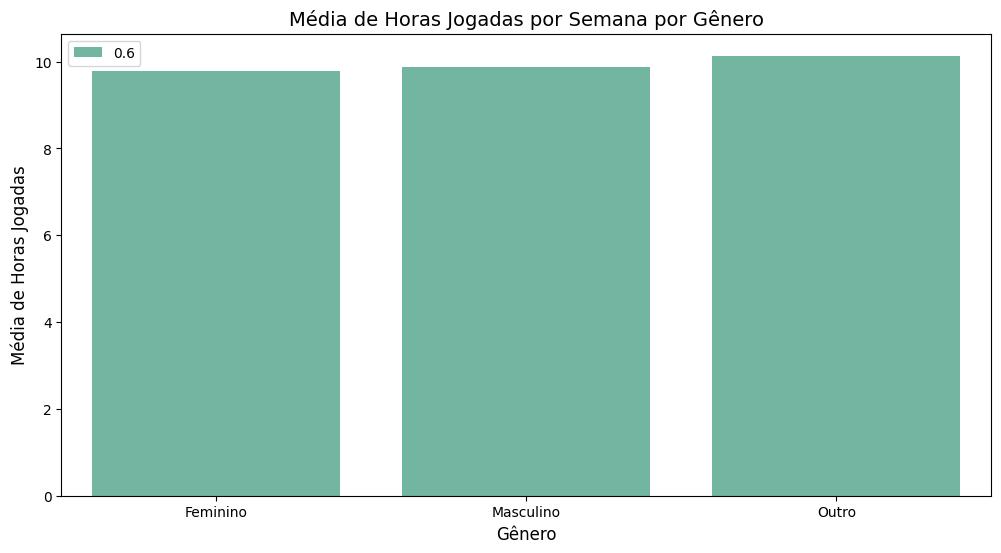

In [29]:
# Tabela de Distribuição de Horas Jogadas por Semana por Gênero com a média de horas jogadas
horas_idade_genero = _df.groupby(['Genero'])['Horas_jogando_por_semana_raw'].mean()
print(horas_idade_genero.head(80))
# BarPlot de Distribuição de Horas Jogadas por Semana por Gênero com a média de horas jogadas
plt.figure(figsize=(12, 6))
sns.barplot(x=horas_idade_genero.index, y=horas_idade_genero.values, palette='Set2', hue=0.6)
plt.title('Média de Horas Jogadas por Semana por Gênero', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Média de Horas Jogadas', fontsize=12)
plt.savefig('graphs/barplot_horas_idade_genero.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\danzi\AppData\Local\Temp\ipykernel_16016\3230091748.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  horas_idade_genero = _df.groupby(['Idade', 'Genero'])['Horas_jogando_por_semana_raw'].mean().unstack()


Genero   Feminino  Masculino      Outro
Idade                                  
10-15   10.856588   6.870233  11.817169
15-20    8.594468   9.618935   7.870408
20-25    6.214894   8.941193  11.699034
25-30   12.448051  11.434753   8.712728
30-35   10.715935  11.098632  10.048407
35-40    9.009744  10.644449  12.154054
40-45   11.213444  12.762675  10.744986
45-50   10.049635   9.702791   8.735699


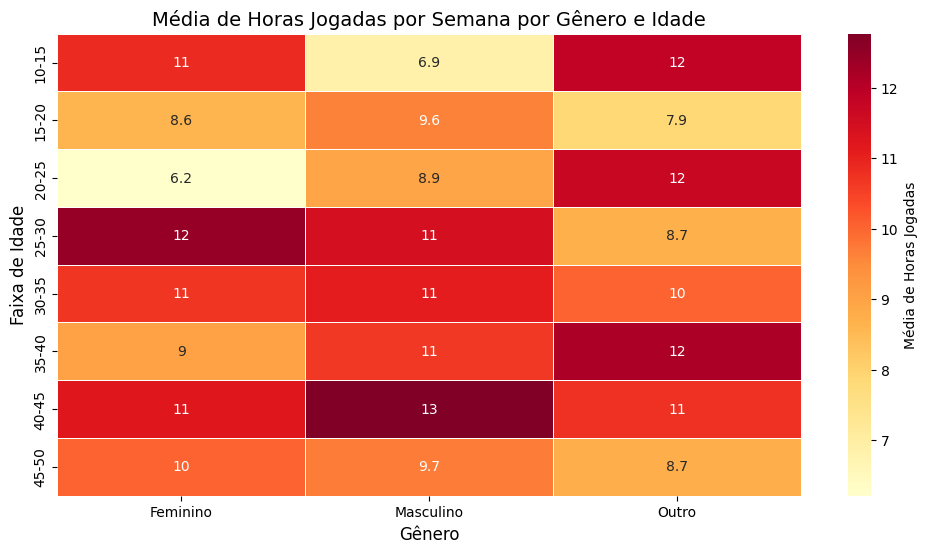

In [16]:
# Tabela de Distribuição de Horas Jogadas por Semana por Gênero e Idade com a média de horas jogadas
horas_idade_genero = _df.groupby(['Idade', 'Genero'])['Horas_jogando_por_semana_raw'].mean().unstack()
print(horas_idade_genero.head(80))
# Heatmap de Distribuição de Horas Jogadas por Semana por Gênero e Idade com a média de horas jogadas
plt.figure(figsize=(12, 6))
sns.heatmap(
    horas_idade_genero,
    cmap='YlOrRd',
    annot=True,  # Mostrar valores nas células
    linewidths=0.5,
    cbar_kws={'label': 'Média de Horas Jogadas'}
)
plt.title('Média de Horas Jogadas por Semana por Gênero e Idade', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Faixa de Idade', fontsize=12)
plt.savefig('graphs/heatmap_horas_idade_genero.png', dpi=300, bbox_inches='tight')
plt.show()

Genero
Feminino     5.446809
Masculino    4.472727
Outro        5.666667
Name: Nivel_estresse, dtype: float64


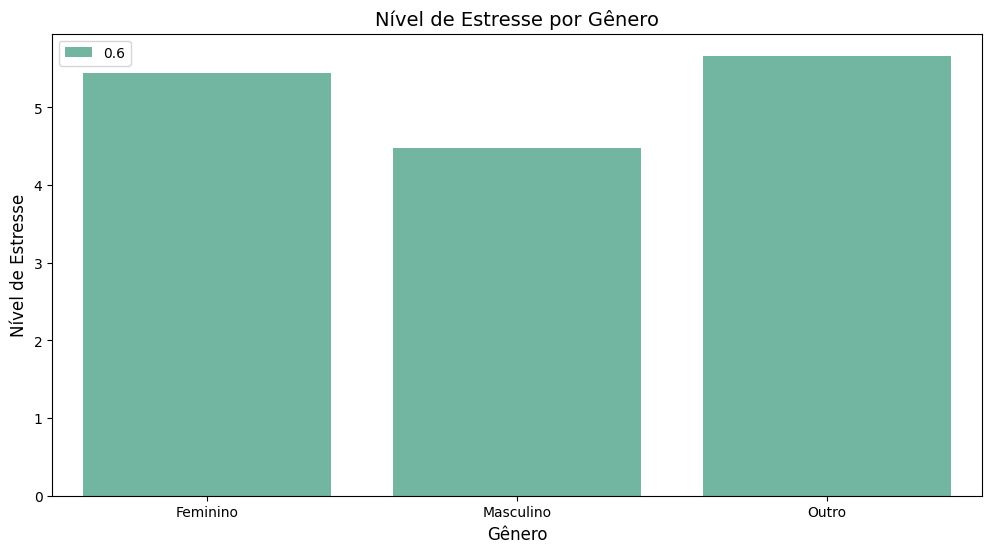

In [28]:
# Tabela de Nivel_estresse por Gênero
estresse_genero = _df.groupby(['Genero'])['Nivel_estresse'].mean()
print(estresse_genero.head(80))
# BarPlot de Nivel_estresse por Gênero
plt.figure(figsize=(12, 6))
sns.barplot(x=estresse_genero.index, y=estresse_genero.values, palette='Set2', hue=0.6)
plt.title('Nível de Estresse por Gênero', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Nível de Estresse', fontsize=12)
plt.savefig('graphs/barplot_estresse_genero.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\danzi\AppData\Local\Temp\ipykernel_16016\2094555095.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estresse_genero = _df.groupby(['Horas_jogando_por_semana', 'Genero'])['Nivel_estresse'].mean().unstack()


Genero                    Feminino  Masculino     Outro
Horas_jogando_por_semana                               
0-2                       4.166667   4.333333  3.500000
2-4                       6.800000   2.800000  5.333333
4-6                       5.500000   5.000000  6.600000
6-8                       5.285714   6.875000  4.000000
8-10                      6.000000   3.714286  5.111111
10-12                     4.818182   4.375000  6.166667
12-14                     8.000000   5.000000  5.750000
14-16                     5.250000   4.500000  6.000000
16-18                     7.750000   3.333333  5.666667
18-20                     5.000000   4.500000       NaN
20-22                     1.000000   3.000000  9.000000
22-24                          NaN        NaN       NaN
24-26                          NaN        NaN  5.000000


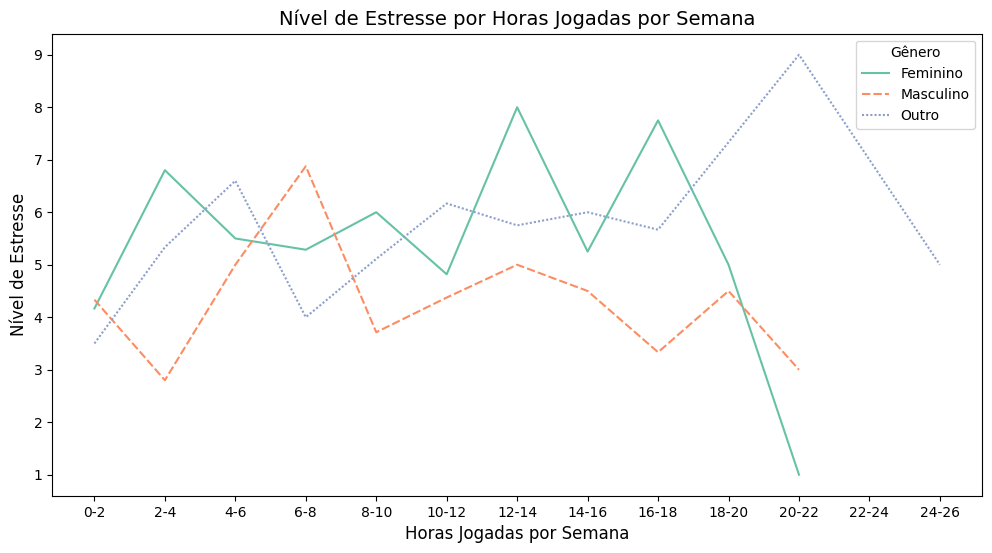

In [18]:
# Tabela de Nivel_estresse por Horas Jogadas por Semana
estresse_genero = _df.groupby(['Horas_jogando_por_semana', 'Genero'])['Nivel_estresse'].mean().unstack()
print(estresse_genero.head(80))
# Lineplot de Nivel_estresse por Horas Jogadas por Semana uma linha para cada gênero
plt.figure(figsize=(12, 6))
sns.lineplot(data=estresse_genero, palette='Set2')
plt.title('Nível de Estresse por Horas Jogadas por Semana', fontsize=14)
plt.xlabel('Horas Jogadas por Semana', fontsize=12)
plt.ylabel('Nível de Estresse', fontsize=12)
plt.legend(title='Gênero')
plt.savefig('graphs/lineplot_estresse_horas.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\danzi\AppData\Local\Temp\ipykernel_16016\4251756709.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estresse_genero = _df.groupby(['Horas_jogando_por_semana', 'Genero'])['Nivel_estresse'].mean().unstack()


Genero                    Feminino  Masculino     Outro
Horas_jogando_por_semana                               
0-2                       4.166667   4.333333  3.500000
2-4                       6.800000   2.800000  5.333333
4-6                       5.500000   5.000000  6.600000
6-8                       5.285714   6.875000  4.000000
8-10                      6.000000   3.714286  5.111111
10-12                     4.818182   4.375000  6.166667
12-14                     8.000000   5.000000  5.750000
14-16                     5.250000   4.500000  6.000000
16-18                     7.750000   3.333333  5.666667
18-20                     5.000000   4.500000       NaN
20-22                     1.000000   3.000000  9.000000
22-24                          NaN        NaN       NaN
24-26                          NaN        NaN  5.000000


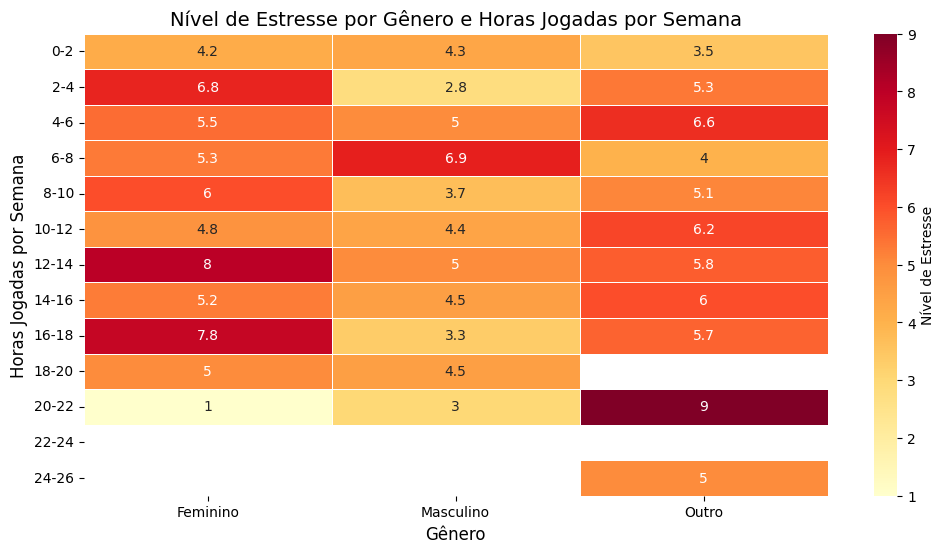

In [19]:
# Tabela de Nivel_estresse por Gênero e Horas Jogadas por Semana
estresse_genero = _df.groupby(['Horas_jogando_por_semana', 'Genero'])['Nivel_estresse'].mean().unstack()
print(estresse_genero.head(80))
# heatmap de Nivel_estresse por Gênero e Horas Jogadas por Semana
plt.figure(figsize=(12, 6))
sns.heatmap(
    estresse_genero,
    cmap='YlOrRd',
    annot=True,  # Mostrar valores nas células
    linewidths=0.5,
    cbar_kws={'label': 'Nível de Estresse'}
)
plt.title('Nível de Estresse por Gênero e Horas Jogadas por Semana', fontsize=14)
plt.ylabel('Horas Jogadas por Semana', fontsize=12)
plt.xlabel('Gênero', fontsize=12)
plt.savefig('graphs/heatmap_estresse_genero_horas.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\danzi\AppData\Local\Temp\ipykernel_16016\1625119010.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idade_genero = _df.groupby(['Idade', 'Genero'])['Nivel_estresse'].mean().unstack()


Genero  Feminino  Masculino     Outro
Idade                                
10-15   6.666667   5.888889  9.000000
15-20   4.555556   2.800000  6.000000
20-25   5.250000   3.375000  8.000000
25-30   5.666667   5.500000  4.857143
30-35   4.200000   4.200000  5.400000
35-40   5.888889   4.166667  4.222222
40-45   5.250000   1.333333  6.000000
45-50   6.428571   6.600000  5.400000


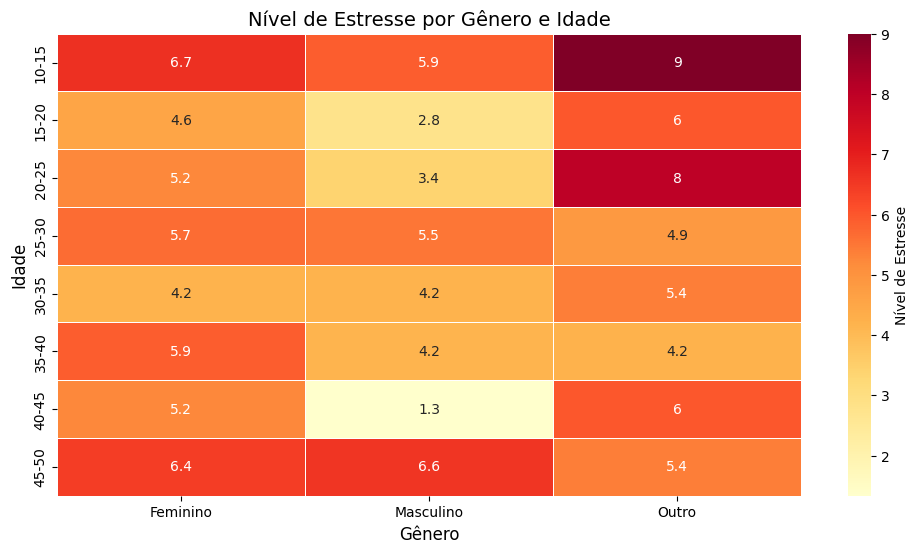

In [20]:
# Tabela de Nivel_estresse por Gênero e Idade
idade_genero = _df.groupby(['Idade', 'Genero'])['Nivel_estresse'].mean().unstack()
print(idade_genero.head(80))
# Heatmap de Nivel_estresse por Gênero e Idade
plt.figure(figsize=(12, 6))
sns.heatmap(
    idade_genero,
    cmap='YlOrRd',
    annot=True,  # Mostrar valores nas células
    linewidths=0.5,
    cbar_kws={'label': 'Nível de Estresse'}
)
plt.title('Nível de Estresse por Gênero e Idade', fontsize=14)
plt.ylabel('Idade', fontsize=12)
plt.xlabel('Gênero', fontsize=12)
plt.savefig('graphs/heatmap_estresse_genero_idade.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# Dados já agregados (estresse_horas)
estresse_horas = _df.groupby(['Genero', 'Idade', 'Horas_jogando_por_semana'])['Nivel_estresse'].mean().unstack()
print(estresse_horas.head(80))

# Função para plotar heatmap
def plot_heatmap(data, title, cmap='YlOrRd'):
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        data,
        cmap=cmap,
        annot=True,  # Mostrar valores nas células
        linewidths=0.5,
        cbar_kws={'label': 'Nível de Estresse'}
    )
    plt.title(title, fontsize=14)
    plt.xlabel('Horas Jogadas por Semana', fontsize=12)
    plt.ylabel('Faixa de Idade', fontsize=12)
    plt.savefig(f'graphs/heatmap_{title}.png', dpi=300, bbox_inches='tight')
    plt.show()

Horas_jogando_por_semana  0-2   2-4  4-6        6-8      8-10  10-12  12-14  \
Genero    Idade                                                               
Feminino  10-15           NaN   4.0  NaN        NaN       NaN    9.0    NaN   
          15-20           5.0   9.0  NaN   4.500000       NaN    4.0    NaN   
          20-25           4.0  10.0  NaN   5.000000       NaN    2.0    NaN   
          25-30           NaN   NaN  NaN   3.500000       NaN    6.0    NaN   
          30-35           NaN   NaN  3.0        NaN  3.000000    2.5    NaN   
          35-40           2.5   NaN  8.0   6.000000  9.000000    7.0    8.0   
          40-45           6.0   NaN  NaN        NaN       NaN    6.0    NaN   
          45-50           NaN   5.5  NaN  10.000000       NaN    NaN    NaN   
Masculino 10-15           8.0   4.0  1.0   9.500000  6.000000    5.5    NaN   
          15-20           3.0   NaN  3.0        NaN  2.000000    NaN    5.0   
          20-25           NaN   2.0  NaN        NaN 

C:\Users\danzi\AppData\Local\Temp\ipykernel_16016\2385736224.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estresse_horas = _df.groupby(['Genero', 'Idade', 'Horas_jogando_por_semana'])['Nivel_estresse'].mean().unstack()


In [22]:
# Pegar os gêneros únicos
generos = estresse_horas.index.get_level_values('Genero').unique()

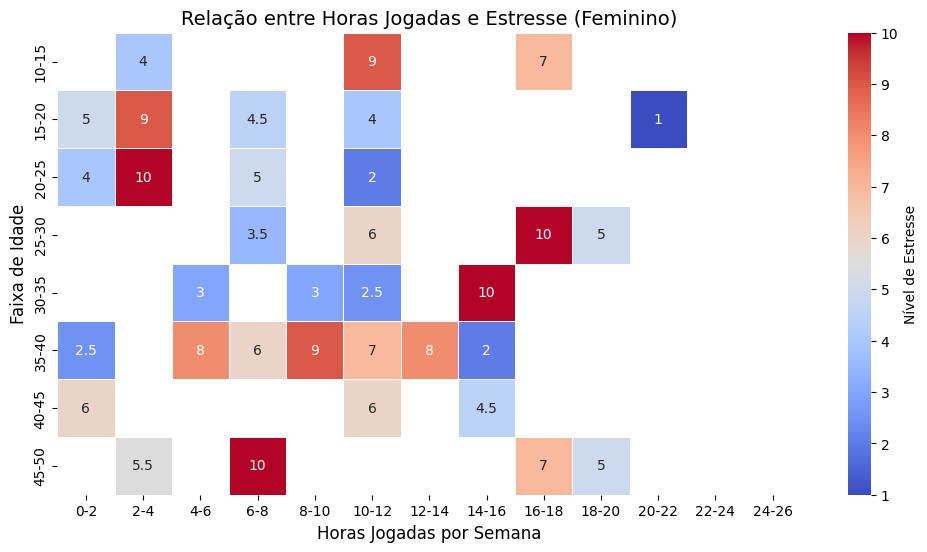

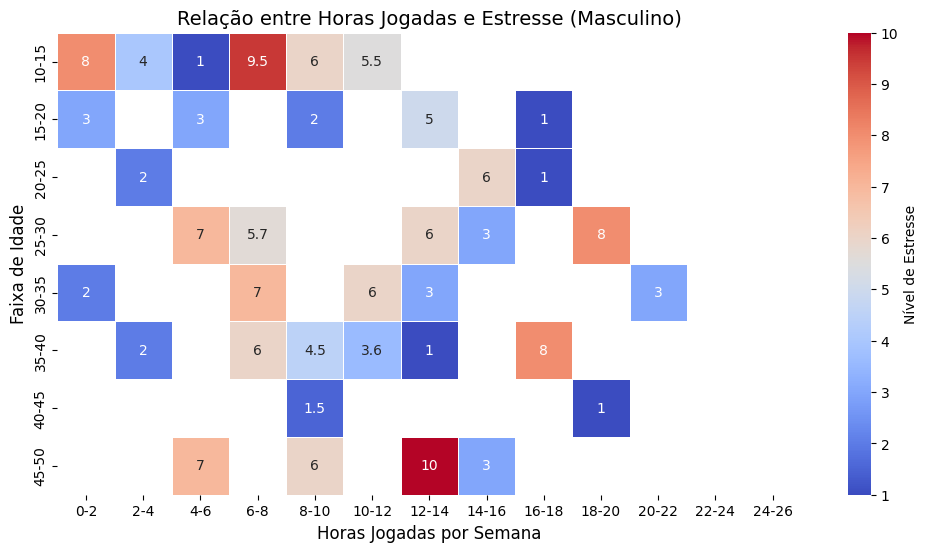

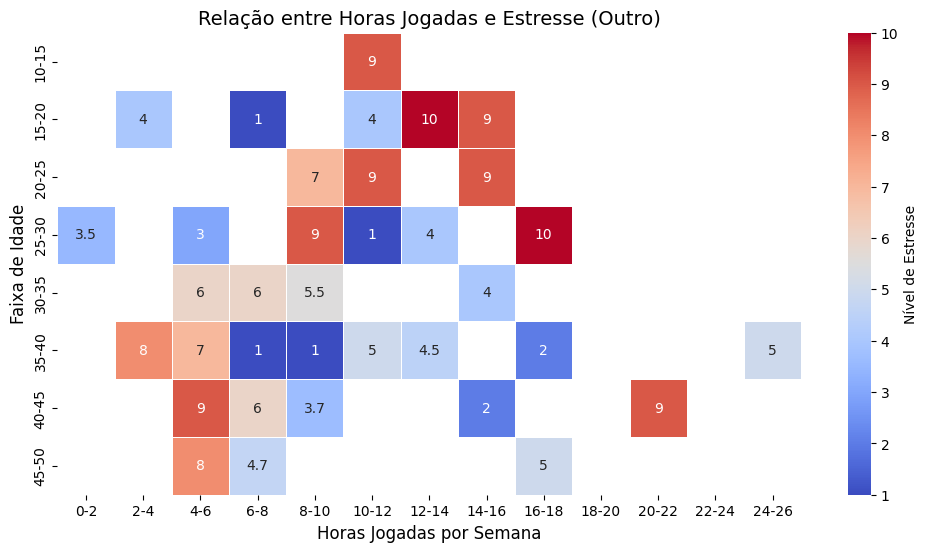

In [23]:
# Gerar heatmap para cada gênero
for genero in generos:
    dados_genero = estresse_horas.loc[genero]
    plot_heatmap(
        dados_genero,
        title=f'Relação entre Horas Jogadas e Estresse ({genero})',
        cmap='coolwarm' 
    )

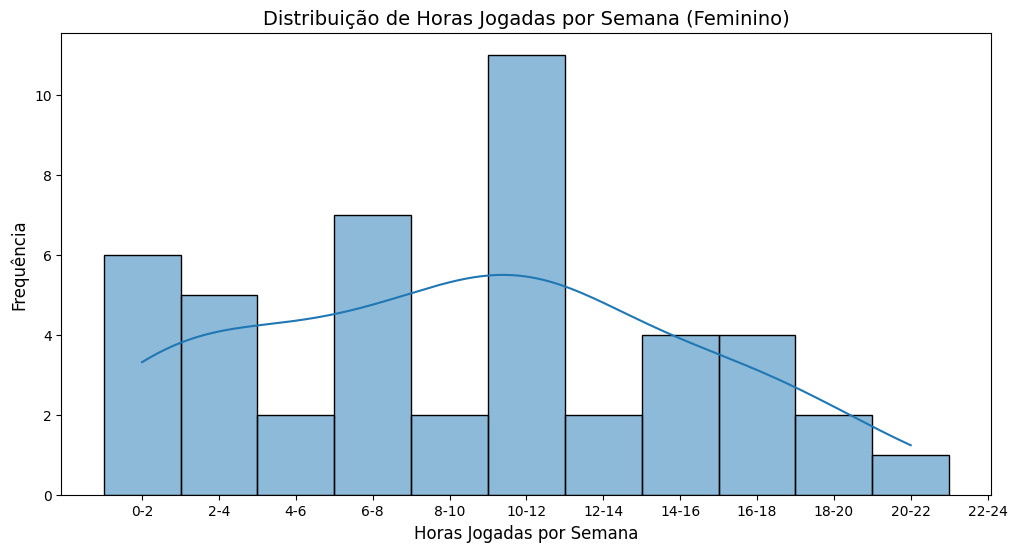

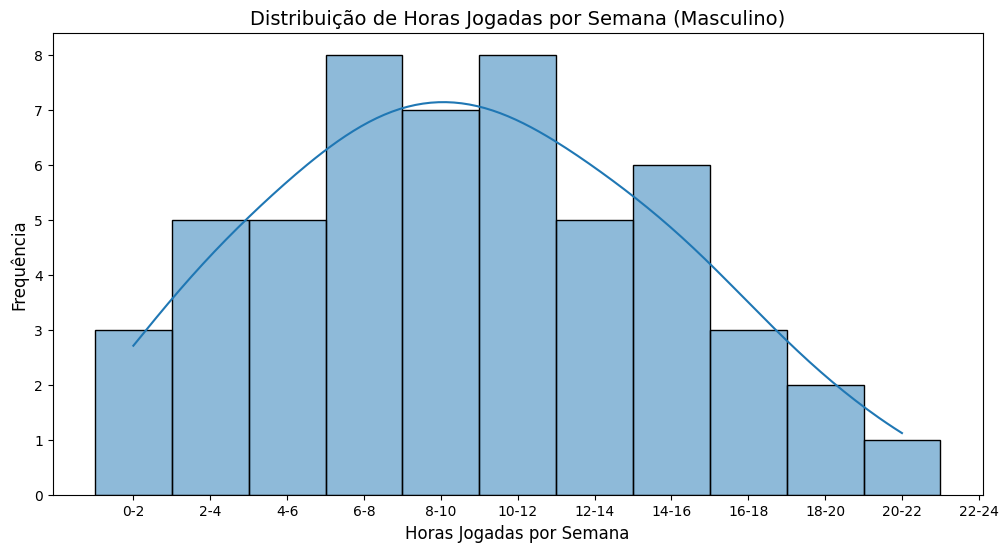

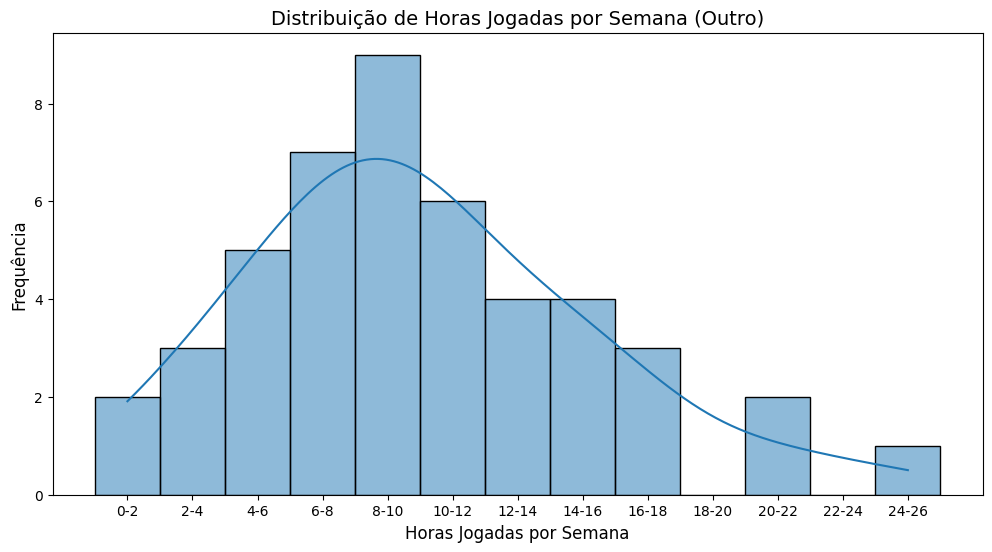

In [24]:
# Gerar um histograma para cada gênero da distribuição de horas jogadas por semana
for genero in generos:
    dados_genero = _df[_df['Genero'] == genero]
    plt.figure(figsize=(12, 6))
    sns.histplot(dados_genero['Horas_jogando_por_semana'], bins=20, kde=True)
    plt.title(f'Distribuição de Horas Jogadas por Semana ({genero})', fontsize=14)
    plt.xlabel('Horas Jogadas por Semana', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.savefig(f'graphs/histograma_horas_jogando_{genero}.png', dpi=300, bbox_inches='tight')
    plt.show()

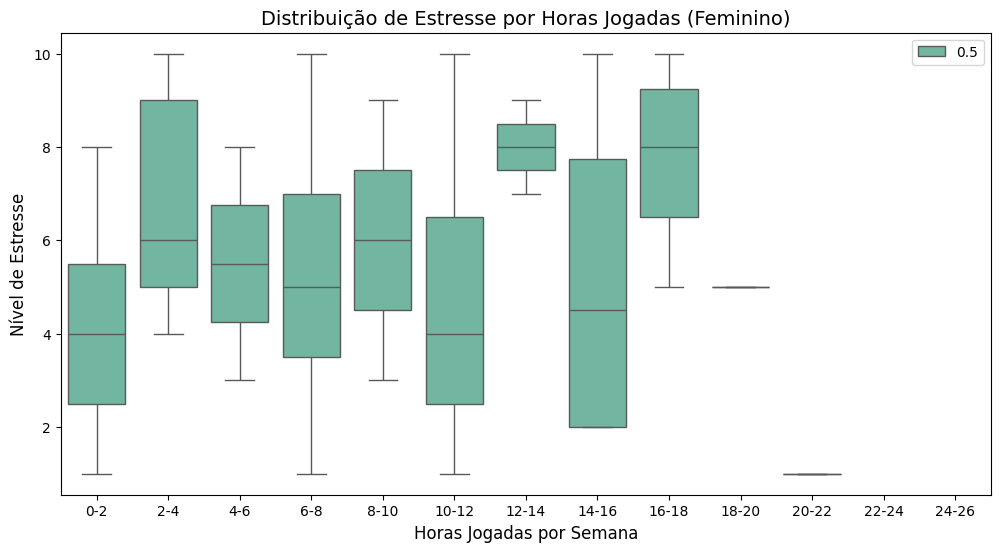

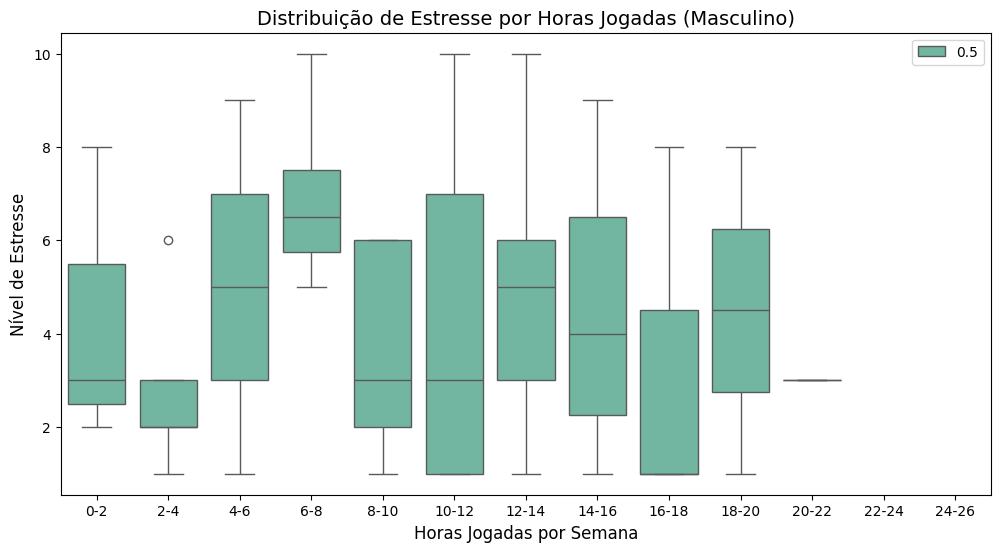

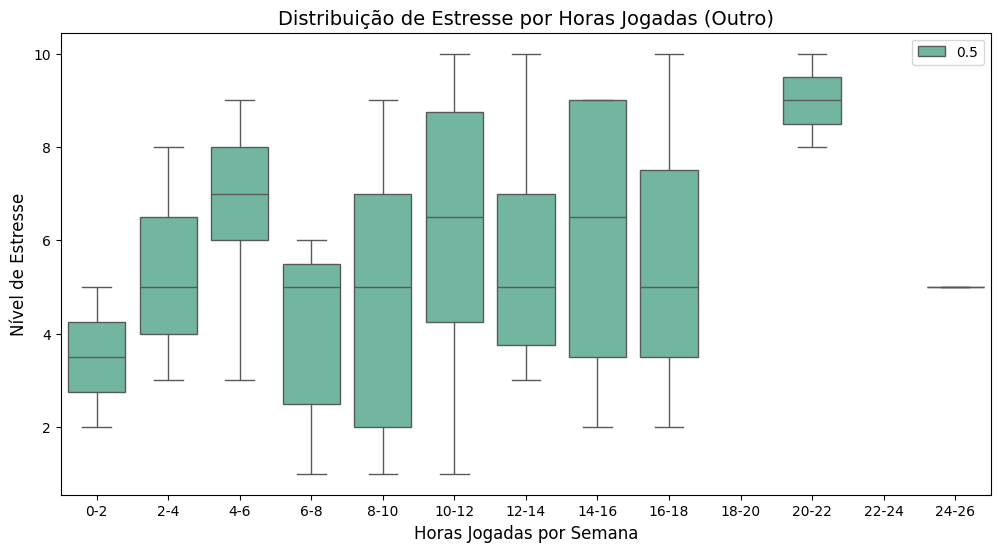

In [27]:
# Gerar um boxplot para cada gênero da distribuição de estresse
for genero in generos:
    dados_genero = _df[_df['Genero'] == genero]
    plt.figure(figsize=(12, 6))
    sns.boxplot(y='Nivel_estresse', x='Horas_jogando_por_semana', data=dados_genero, palette='Set2', hue=0.5)
    plt.title(f'Distribuição de Estresse por Horas Jogadas ({genero})', fontsize=14)
    plt.xlabel('Horas Jogadas por Semana', fontsize=12)
    plt.ylabel('Nível de Estresse', fontsize=12)
    plt.savefig(f'graphs/boxplot_estresse_horas_{genero}.png', dpi=300, bbox_inches='tight')
    plt.show()

Coeficiente de Correlação de Pearson: 0.06


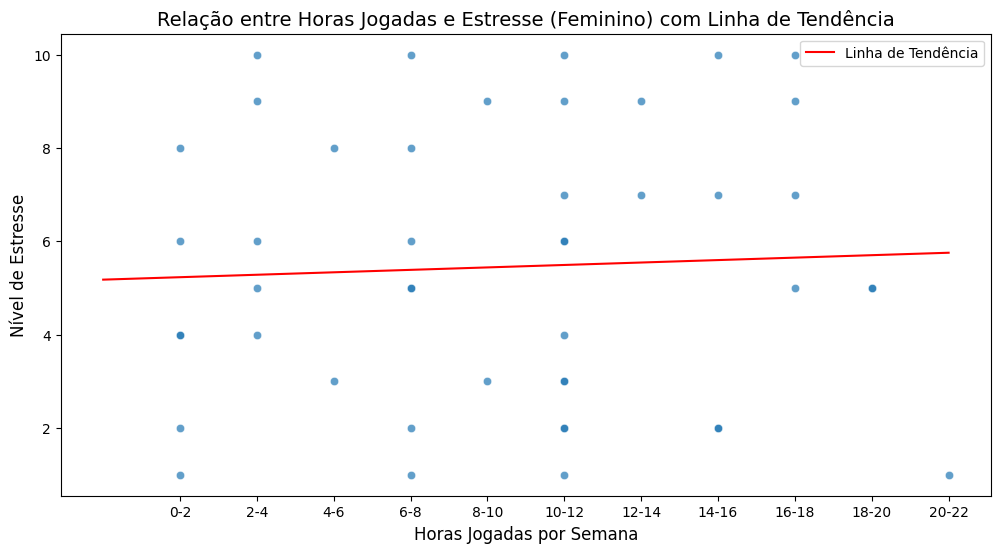

Coeficiente de Correlação de Pearson: 0.02


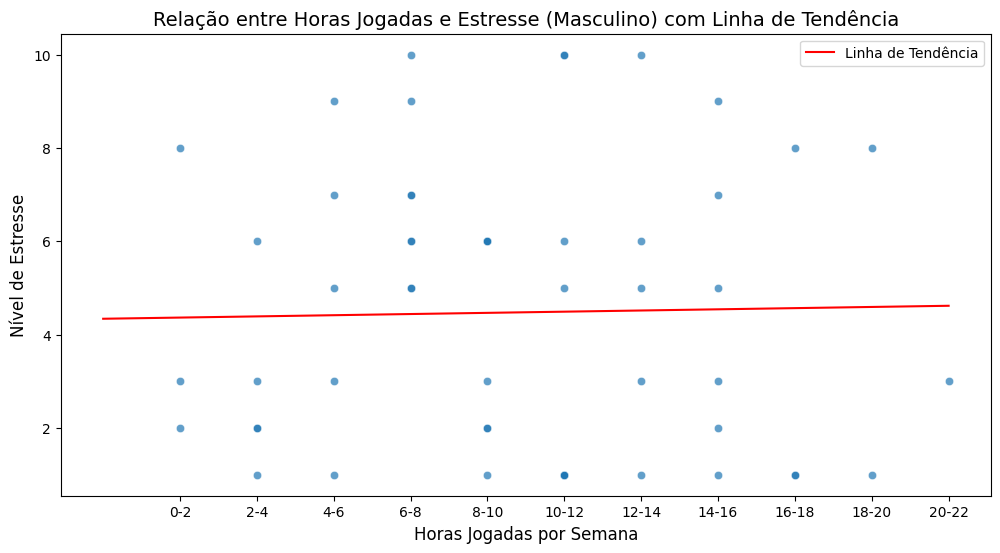

Coeficiente de Correlação de Pearson: 0.08


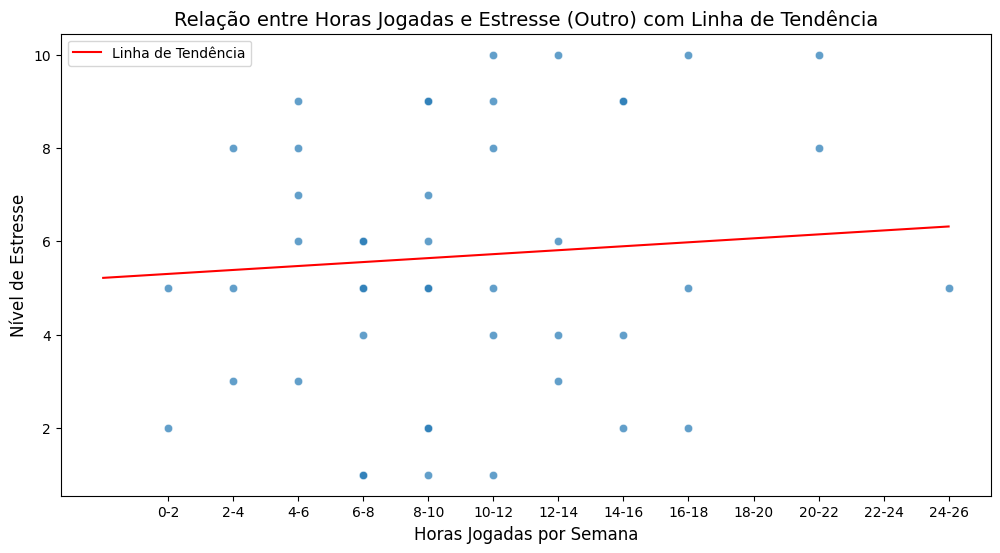

In [26]:
# Gerar um gráfico de dispersão para cada gênero da relação entre horas jogadas e estresse
# Adicionando linha de tendência
for genero in generos:
    dados_genero = _df[_df['Genero'] == genero]
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Horas_jogando_por_semana', y='Nivel_estresse', data=dados_genero, alpha=0.7)
    plt.title(f'Relação entre Horas Jogadas e Estresse ({genero}) com Linha de Tendência', fontsize=14)
    plt.xlabel('Horas Jogadas por Semana', fontsize=12)
    plt.ylabel('Nível de Estresse', fontsize=12)

    # Calculando a linha de tendência (regressão linear)
    x = dados_genero['Horas_jogando_por_semana']
    y = dados_genero['Nivel_estresse']
    a, b = np.polyfit(x.cat.codes, y, 1)  # a é o coeficiente angular e b é o coeficiente linear

    # gerar o coeficiente de correlacao de Pearson
    x_raw = dados_genero['Horas_jogando_por_semana_raw']
    correlation = np.corrcoef(x_raw, y)[0, 1]
    print(f'Coeficiente de Correlação de Pearson: {correlation:.2f}')

    # Plotando a linha de tendência
    plt.plot(x.cat.codes, a*x.cat.codes + b, color='red', label='Linha de Tendência')
    
    plt.legend()
    plt.savefig(f'graphs/scatter_plot_estresse_horas_{genero}.png', dpi=300, bbox_inches='tight')
    plt.show()